<a href="https://colab.research.google.com/github/Prattoypaul/newDeeplr/blob/machinel/SonarDs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf


In [ ]:
from tensorflow import keras

In [38]:
ds=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sonar_data/Copy of sonar data.csv",header=None)

In [39]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [40]:
ds.shape

(208, 61)

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [43]:
ds=ds.apply(le.fit_transform)

In [44]:
ds.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,84.052885,90.067308,93.682692,87.37500,96.889423,96.134615,97.274038,99.875000,101.461538,103.177885,100.062500,103.096154,97.932692,100.769231,101.024038,100.56250,101.346154,101.894231,102.312500,101.144231,103.326923,103.427885,101.471154,103.288462,101.269231,100.802885,101.975962,101.658654,102.620192,102.629808,102.826923,101.995192,102.480769,101.971154,103.076923,102.129808,102.456731,102.274038,100.158654,102.754808,101.072115,103.500000,101.870192,97.394231,101.379808,96.875000,99.567308,100.812500,95.514423,71.975962,76.423077,67.086538,62.264423,60.625000,57.899038,56.610577,51.081731,54.250000,51.567308,44.817308,0.466346
std,49.495445,50.885163,54.322932,52.05853,55.158816,56.344362,55.383920,57.693625,59.456138,59.810103,58.602163,59.637637,56.572943,57.651666,58.194115,58.52978,59.071441,59.613719,59.359817,58.738085,59.903536,60.067632,59.148623,59.851131,58.553948,58.538518,58.387051,58.715509,59.001310,59.788213,59.807169,59.036671,59.057326,59.568490,59.744899,59.452717,59.768459,59.413941,59.265951,59.457308,58.668228,60.188592,59.038900,56.768692,59.144913,57.682655,58.185737,58.785358,55.813352,42.283885,43.179816,39.298833,37.035983,36.058645,35.825050,32.211668,32.638380,33.382355,31.452369,28.694548,0.500070
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.750000,47.750000,47.750000,42.75000,49.750000,47.750000,49.750000,49.750000,49.750000,51.750000,49.750000,51.750000,49.750000,51.750000,51.750000,50.75000,51.750000,50.750000,51.750000,50.750000,51.750000,51.750000,50.750000,51.750000,50.750000,49.750000,51.750000,50.750000,51.750000,50.750000,51.750000,51.750000,51.750000,50.750000,51.750000,50.750000,50.750000,51.750000,47.750000,51.750000,51.750000,51.750000,51.000000,48.750000,50.750000,46.750000,49.750000,50.750000,48.750000,38.750000,42.750000,35.750000,29.750000,29.750000,25.750000,31.000000,24.000000,27.000000,25.750000,21.000000,0.000000
50%,80.000000,91.000000,92.500000,87.50000,98.500000,95.500000,96.500000,99.500000,101.500000,103.500000,99.500000,103.500000,98.500000,101.500000,101.500000,100.50000,100.500000,101.500000,101.500000,100.500000,103.500000,103.500000,101.500000,103.500000,101.500000,101.000000,102.500000,102.500000,103.500000,102.500000,102.500000,102.500000,103.500000,101.500000,103.500000,101.500000,102.500000,102.500000,99.500000,102.500000,100.500000,103.500000,101.500000,97.500000,100.500000,96.500000,98.500000,99.500000,94.500000,71.000000,74.500000,64.500000,62.500000,58.000000,54.000000,52.500000,43.500000,48.000000,48.500000,41.000000,0.000000
75%,125.250000,132.250000,141.250000,130.25000,144.250000,144.250000,144.250000,149.25

In [45]:
ds[60].value_counts()

0    111
1     97
Name: 60, dtype: int64

In [46]:
ds.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,96.351351,100.279279,103.873874,101.297297,110.603604,107.432432,104.891892,112.954955,123.612613,125.630631,126.540541,126.522523,116.603604,111.396396,105.981982,103.477477,103.810811,103.648649,109.702703,112.846847,117.369369,114.414414,109.639640,108.657658,102.612613,102.405405,107.072072,108.954955,105.477477,101.927928,95.297297,97.909910,97.135135,93.288288,89.432432,86.297297,90.081081,100.846847,105.585586,102.963964,103.378378,112.369369,115.333333,111.198198,117.918919,114.315315,118.081081,120.306306,116.342342,80.216216,89.981982,78.891892,66.675676,65.198198,58.405405,59.945946,50.936937,59.657658,54.747748,45.918919
1,69.979381,78.381443,82.020619,71.443299,81.195876,83.206186,88.556701,84.907216,76.113402,77.484536,69.762887,76.288660,76.567010,88.608247,95.350515,97.226804,98.525773,99.886598,93.855670,87.752577,87.257732,90.855670,92.123711,97.144330,99.731959,98.969072,96.144330,93.309278,99.350515,103.432990,111.443299,106.670103,108.597938,111.907216,118.690722,120.247423,116.618557,103.907216,93.948454,102.515464,98.432990,93.350515,86.463918,81.597938,82.453608,76.917526,78.381443,78.505155,71.680412,62.546392,60.907216,53.577320,57.216495,55.391753,57.319588,52.793814,51.247423,48.061856,47.927835,43.556701


In [47]:
ds.dtypes

0     int64
1     int64
2     int64
3     int64
4     int64
      ...  
56    int64
57    int64
58    int64
59    int64
60    int64
Length: 61, dtype: object

In [48]:
x=ds.drop(columns=60,axis=0)
y=ds[60]

In [49]:
y

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int64

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(xtrain.shape,xtest.shape)

(187, 60) (21, 60)


In [51]:
model=keras.Sequential([
                        keras.layers.Dense(60,input_shape=(60,),activation='relu'),
                        keras.layers.Dense(32,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [52]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 3ms/step - loss: 54.6008 - accuracy: 0.4337
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 14.5455 - accuracy: 0.5904
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 16.0424 - accuracy: 0.5723
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 6.7043 - accuracy: 0.6205
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 6.5377 - accuracy: 0.6084
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 4.0577 - accuracy: 0.6928
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 4.4351 - accuracy: 0.6928
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 2.9470 - accuracy: 0.7048
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 2.2495 - accuracy: 0.7470
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 1.9553 - accuracy: 0.7711
Epoch 11/100
6/6 [========

In [54]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 0s 7ms/step - loss: 2.8819 - accuracy: 0.7619


[2.88188099861145, 0.761904776096344]

In [55]:
yp=model.predict(xtest)

In [56]:
yp[:5]

array([[4.3387653e-16],
       [1.0000000e+00],
       [9.9998724e-01],
       [2.1818940e-15],
       [1.0000000e+00]], dtype=float32)

In [57]:
y_pred=[]
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [58]:
y_pred[:5]

[0, 1, 1, 0, 1]

In [59]:
ytest[:5]

186    0
155    0
165    0
200    0
58     1
Name: 60, dtype: int64

In [60]:
from sklearn.metrics import confusion_matrix,classification_report

In [61]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.75      0.82      0.78        22

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42



In [67]:
import matplotlib.pyplot as plt

import seaborn as sn

Text(69.0, 0.5, 'True Answer')

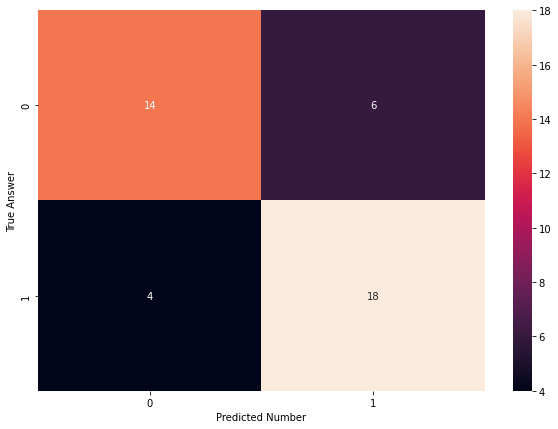

In [68]:

cm=tf.math.confusion_matrix(labels=ytest,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Number')
plt.ylabel('True Answer')

In [69]:
lgt=LogisticRegression()

In [70]:
lgt.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lgt.score(xtest,ytest)

0.6190476190476191

In [73]:
xtest_prediction=lgt.predict(xtest)

In [74]:
accuracy_score(xtest_prediction,ytest)

0.6190476190476191